### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

**_<span style="color:blue">Name</span>_** — название игры  
**_<span style="color:blue">Platform</span>_** — платформа  
**_<span style="color:blue">Year_of_Release</span>_** — год выпуска  
**_<span style="color:blue">Genre</span>_** — жанр игры  
**_<span style="color:blue">NA_sales</span>_** — продажи в Северной Америке (миллионы долларов)  
**_<span style="color:blue">EU_sales</span>_** — продажи в Европе (миллионы долларов)  
**_<span style="color:blue">JP_sales</span>_** — продажи в Японии (миллионы долларов)  
**_<span style="color:blue">Other_sales</span>_** — продажи в других странах (миллионы долларов)  
**_<span style="color:blue">Critic_Score</span>_** — оценка критиков (максимум 100)  
**_<span style="color:blue">User_Score</span>_** — оценка пользователей (максимум 10)  
**_<span style="color:blue">Rating</span>_** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

### План исследования

**<span style="color:black">1. Шаг 1. Ознакомление с данными</span>**  
1.1. Общая информация о датафрейме  
1.2. Определяем где заменять данные  
1.3. Информация о пропусках, методы их заполнения  

**<span style="color:black">2. Шаг 2. Подготовка данных:</span>**    
2.1. Приведение названий столбцов к нижнему регистру  
2.2. Изменение типов данных  
2.3. Обработка пропусков   


**<span style="color:black">3. Шаг 3. Подготовка данных:</span>**     
3.1. Количество выпущенных игр по годам (график)  
3.2. Количество выпущенных игр по платформам(график).  
3.3. Динамика продаж игр по платформам(графики)  
3.4. Boxplot по наиболее популярным на конец 2016 года платформам  
3.5. Влияние отзывов пользователей и критиков на продажи(матрица корреляции)    
3.6. Распределение игр по жанрам  


**<span style="color:black">4. Шаг 4. Портрет пользователя регионов NA, EU, JP:</span>**     
4.2. Определение самых популярных платформ  
4.3. Определение самых популярных жанров   
4.4. Влияние рейтинга ESRB на продажи в отдельном регионе  


**<span style="color:black">5. Шаг 5. Проверка гипотез:</span>**    
5.1. Гипотеза № 1 (о равенстве средних пользовательских рейтингов на XBox One и PC)  
5.2. Гипотеза № 2 (о равенстве средних пользовательских рейтингов жанров Action и Sports)  


**<span style="color:black">6. Шаг 6. Общий вывод</span>**  

## <span style="color:blue">Changelog 27.07.2020 
- [Добавлен линейный график по продажам ВСЕХ платформ](#section1)
- [Актуальный период сокращён до 4-х лет](#section2)
- [В боксплоты добавлены перспективные платформы](#section3)
- [Статистические тесты доработаны](#section4)

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Шаг 1. Ознакомление с данными

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


user_score - численный показатель, а имеет тип object - меняем на 'float'.
Остальные типы столбцов в порядке.

> 1. Много пропусков  
**_<span style="color:blue">critic_score</span>_**  может некоторые игры по каким-то причином не оценивались. Склоняюсь к тому, что заполнять здесь пропуски средним значением, допустим, по жанру -- неправильно. Но чтобы иметь возможность для фильтрации и обработки данных, проставим тут "несуществующий" рейтинг -1.  
**_<span style="color:blue">rating</span>_** Здесь то же самое. Нельзя дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Но по-моему на получение результата анализа конкретно эти пропуски не повлияют. Оставим как есть.  
**_<span style="color:blue">user_score</span>_** - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поступим так же, как и со столбцом critic_score.  
**_<span style="color:blue">year_of_release</span>_**  Присутствует немного пропусков. Медианами эти пропуски не заполнить. Но эти данные и не являются важными для анализа. Имеющихся данных достаточно, поэтому оставляем как есть.

> 2. **_<span style="color:blue">user_score</span>_** - численный показатель, а имеет тип object - меняем на 'float'.
Остальные типы столбцов в порядке.

## Шаг 2. Подготовка данных

Приведём названия столбцов к нижнему регистру для удобства использования

In [5]:
games.columns = games.columns.str.lower()

Приведём к нужному типу данных столбец user_score

Выяснилось, что помино nan есть ещё и некий "tbd"

Гугл говорит нам, что TBD - аббревиатура от английского To Be Determined (будет определено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Служит для отметки неясностей или пропусков, которые надо заполнить.  
Фактически, это игры рейтинг которых на данный момент пока не удалось сформировать. Но числовой тип столбца нам необходим. А поскольку 'tbd' фактически и является NaN, заменим и NaN, и 'tbd' на маркер -1 и приведем значение столбца к числовому:

In [6]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

Пропуски в столбцах critic_score и user_score мы решили заполнить индикатором -1.

In [7]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

Проверим:

In [8]:
games['critic_score'].isnull().sum()

0

In [9]:
games['user_score'].isnull().sum()

0

## Шаг 3. Подготовка данных

#### Сколько игр выпускалось в разные годы

In [10]:
by_year = (
    games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

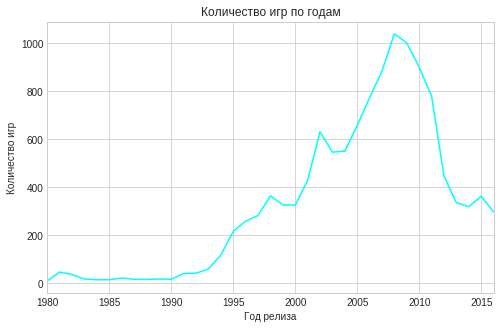

In [11]:
plt.style.use('seaborn-whitegrid')

(
    by_year
        .plot(figsize=(8, 5), colormap='cool', legend=False, title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Количество игр')
)

plt.show()

Пик по количеству игр пришёлся на 2008-2009 года. После этого начался спад. Вероятно по причине появления в жизни людей различных соцсетей и смартфонов.  
В старые игры играть вряд ли кому-то интересно. Поэтому можем ограничиться десятилетним промежутком.


#### Как менялись продажи по платформам

In [12]:
#столбец по суммарным продажам
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
#продажи по платформам
def platform_sales(df):
    return (
        df
            .pivot_table(index='platform', values='sales_total', aggfunc='sum')
            .sort_values('sales_total', ascending=False)
    )

In [14]:
#диаграмма продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='sales_total', figsize=(10, 7), ec='black', legend=False)
            .set(xlabel='Платформа', ylabel='Продажи')
    )
plt.show()

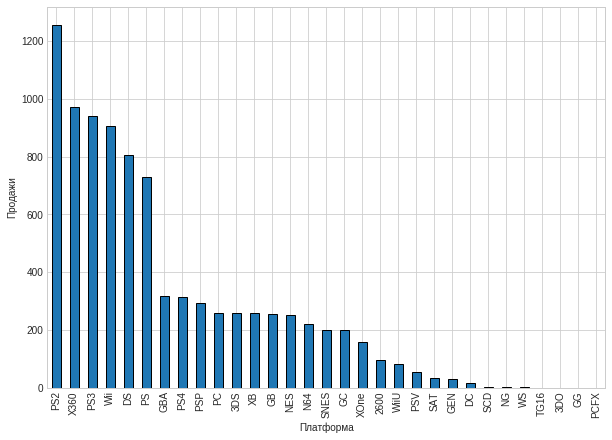

In [15]:
bar_plot(platform_sales(games))

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период. Выберем топ 6 т.к. всё-таки PS надо принять во внимание, а вот между PS и GBA уже пропасть по выручке.

In [16]:
top6 = platform_sales(games).head(6)
top6

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


In [17]:
#Глобальные продажи по платформе по годам
def platform_sales_global(name, df):
    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

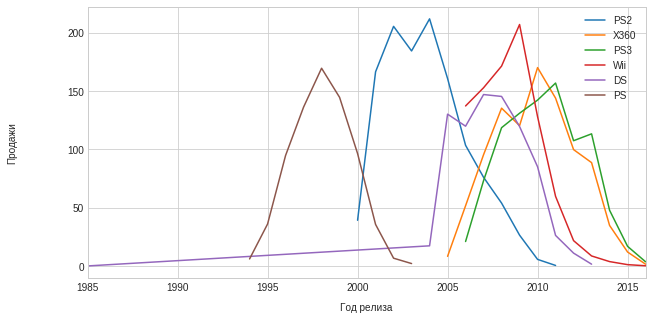

In [18]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top6.index):
    platform_sales_global(platform, games)['sales_total'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Продажи", labelpad=50)
    plt.legend()

<a id='section1'></a>

График по всем платформам:

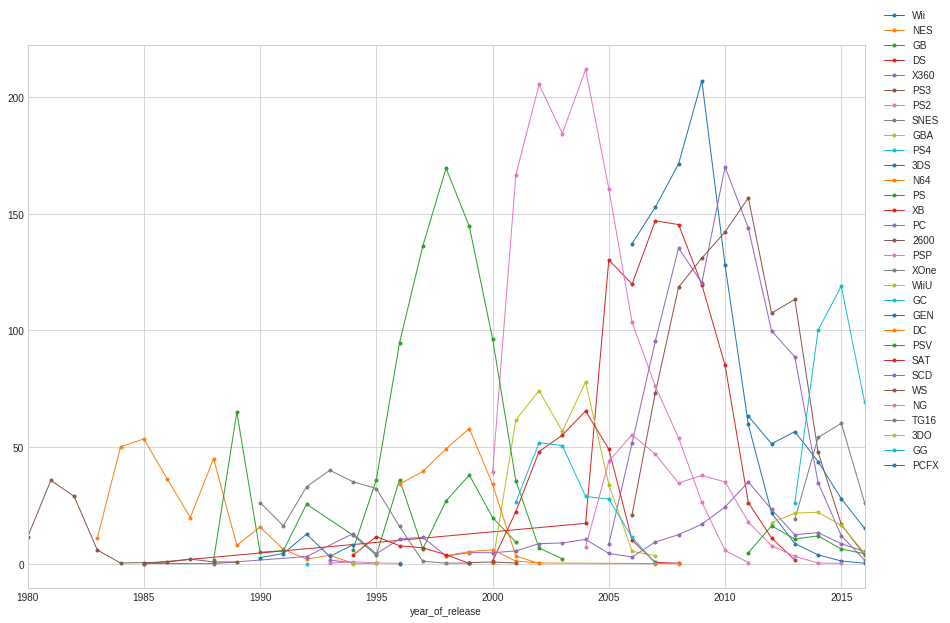

In [19]:
all_platforms = games['platform'].unique()
all_platforms.tolist()

ax = plt.gca()
legend_list = []

for platform in all_platforms:
    games.query('platform == @platform').groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', 
                                                                                              y='sales_total', style='.-',
                                                                                              kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15,10))
    ax.legend(prop={'size':10}, bbox_to_anchor=(1.1, 1.08))
    legend_list.append(platform)


Видим, что в среднем платформа живет ~10 лет. 

<a id='section2'></a>

### Какие платформы лидируют по продажам, растут или падают?

~Итак, на мой взгляд, актуальным периодом является 2005-2016 гг:~ <span style="color:red">UPD!</span> Актуальный период изменён на 2013-2016 гг. 

Предыдущие года отбросим и будем работать только с актуальным периодом.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
Какие платформы лидируют по продажам, растут или падают?

На основании полученных данных выберем несколько потенциально прибыльных платформ.

In [20]:
actual_period = (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)
actual_data = games.loc[actual_period]

In [21]:
sales_total = platform_sales(actual_data)

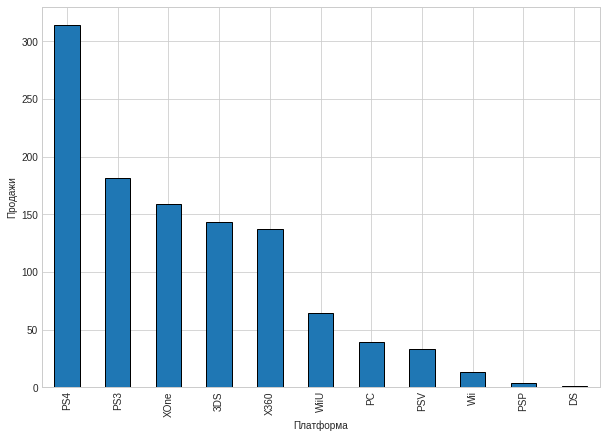

In [22]:
bar_plot(sales_total)

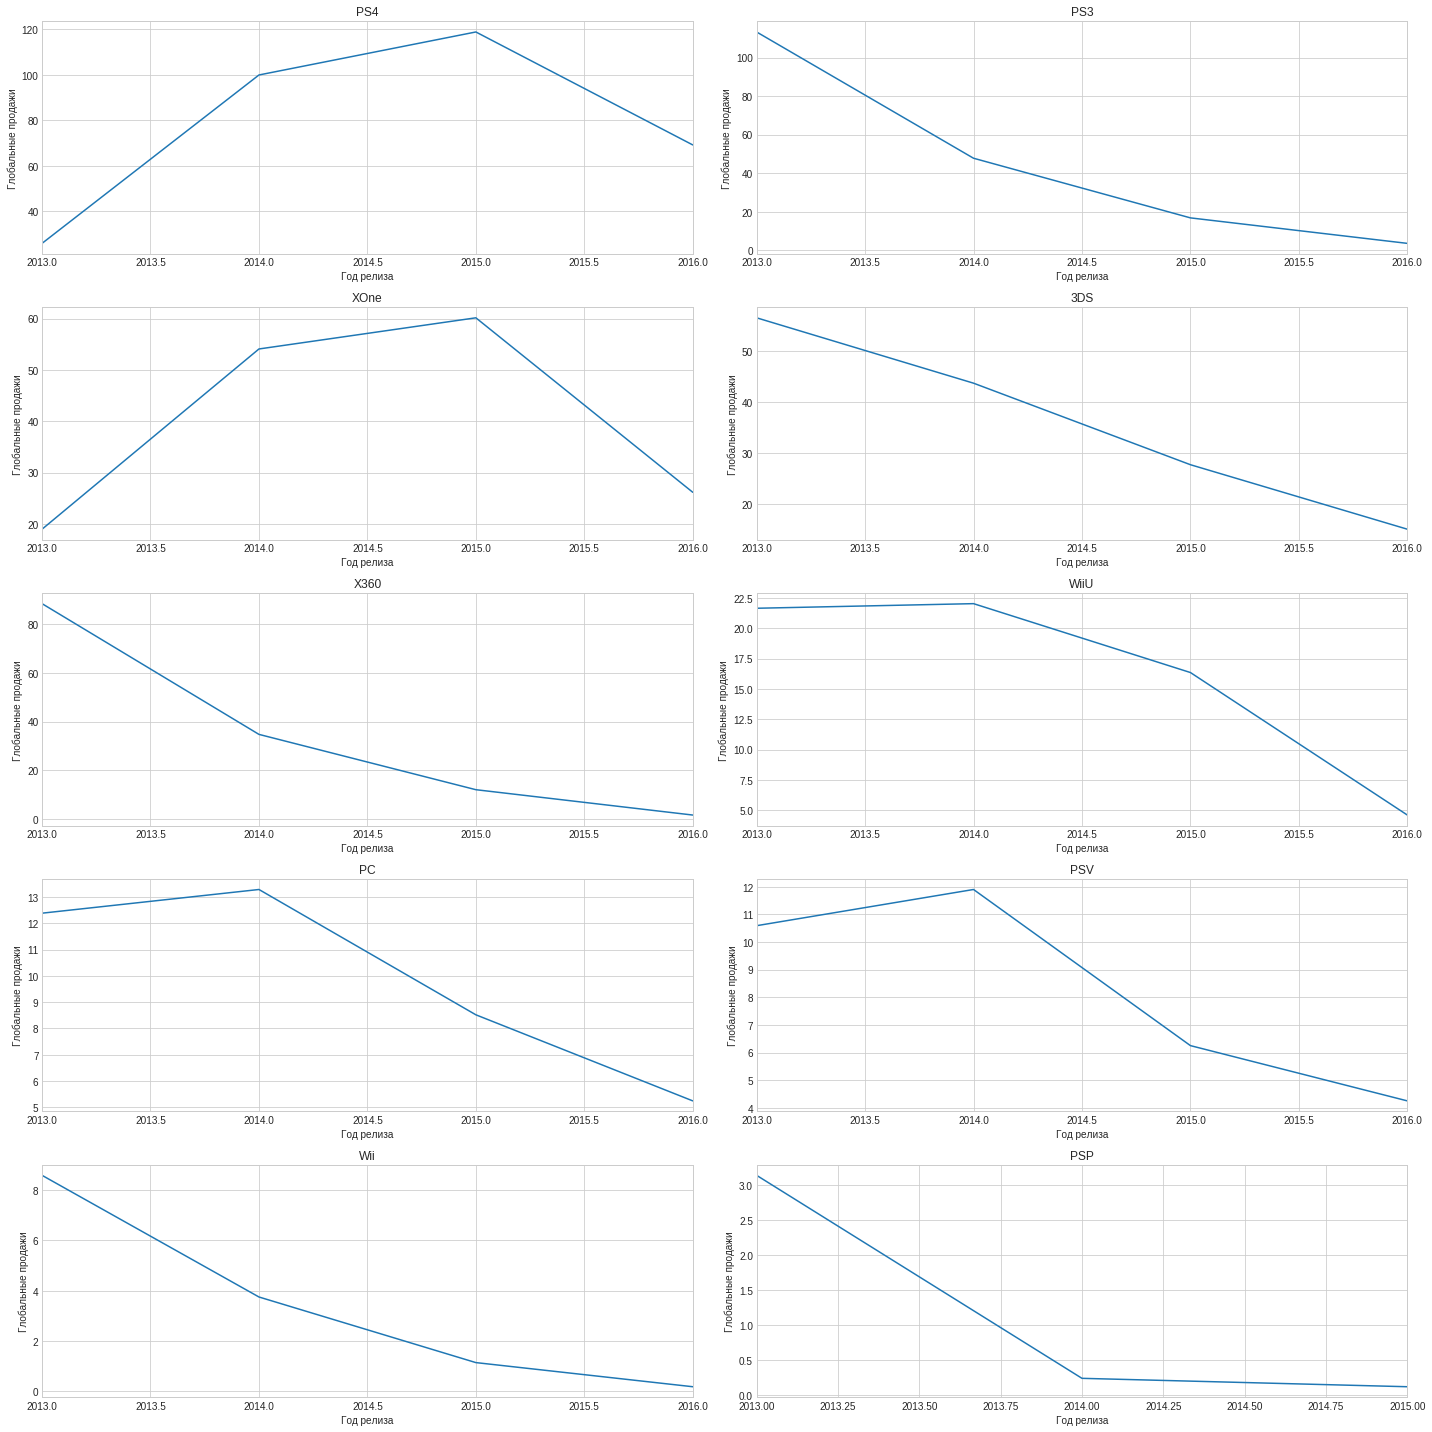

In [23]:
# список платформ за актуальный период
platforms = list(sales_total.index)

# график из 5 строк
rows = 5
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            platform_sales_global(platform, actual_data)['sales_total']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1
        
#cгруппируем пространство между заголовками        
plt.tight_layout()

plt.show()

По графикам видим, что несмотря на лидирующие продажи за актуальный период, продажи большинства платформ подходит значительно падают.  
На конец 2016 года лидируют по продажам следующие платформы:
- PS4;
- XOne;  
Причем количество продаж  снижается. Можно сказать, что весь рынок игр приходит в упадок.

### Boxplot по глобальным продажам каждой игры и разбивкой по платформам

In [24]:
def sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='sales_total', fontsize=25, figsize=(25,10))
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10))
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

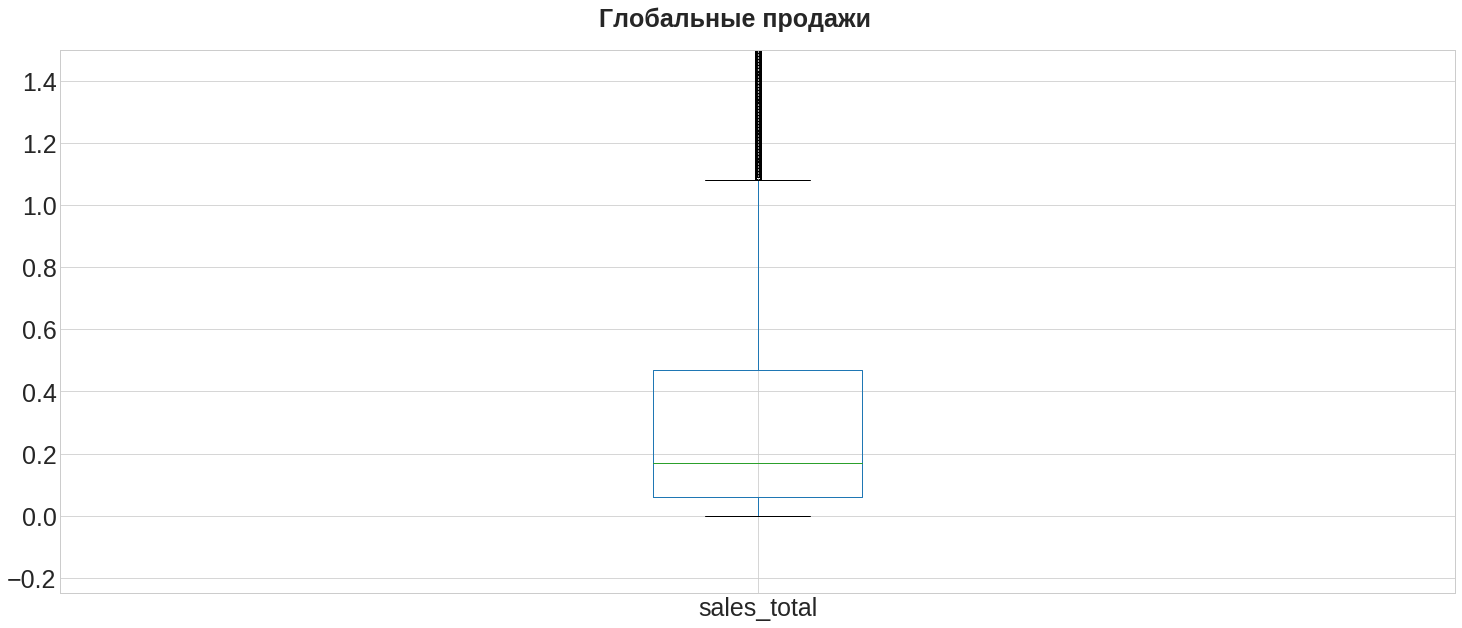

In [25]:
sales_boxplot('Глобальные продажи', ylims = [-0.25, 1.5])

В среднем, продажи игр составляют до ~1,1 млн долларов. Медиана - чуть меньше 0,2 миллиона долларов. 

#### Boxplot по потенциально прибыльным платформам

<a id='section3'></a>

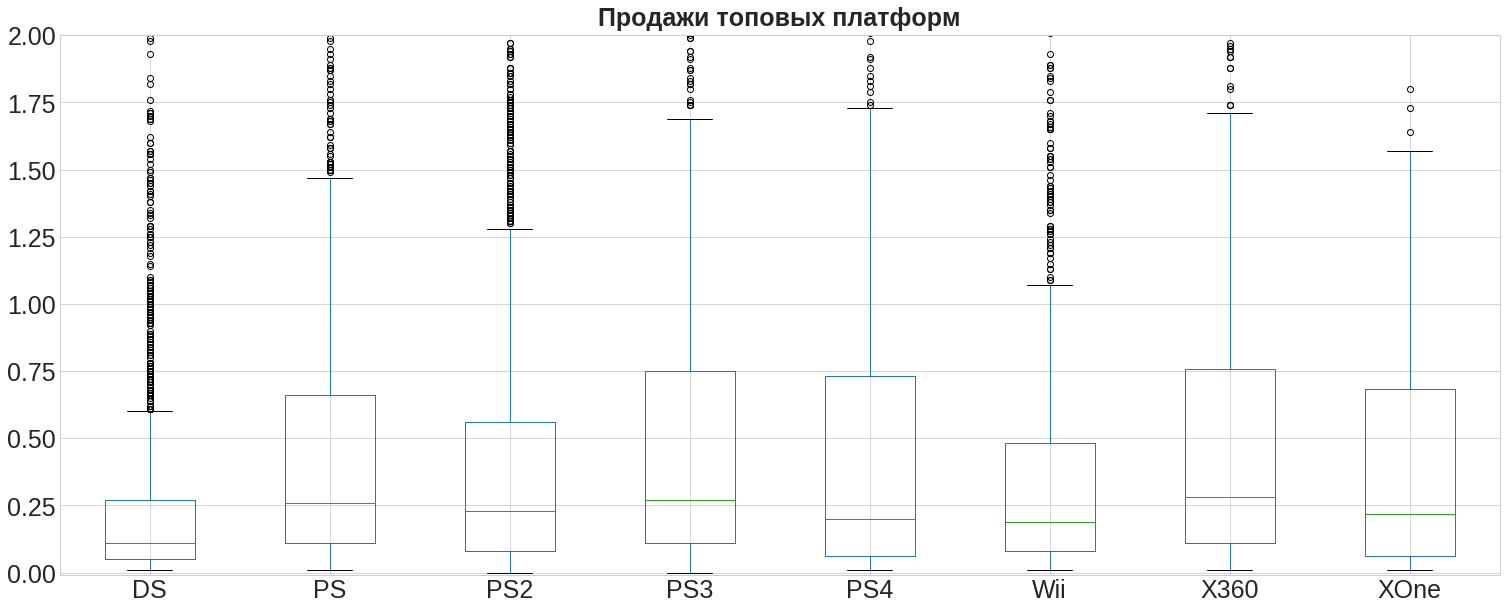

In [26]:
#Отключим предупреждения
import warnings
warnings.filterwarnings('ignore')

top8 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'XOne', 'PS4']
sales_boxplot('Продажи топовых платформ', query_condition="platform in @top8", ylims = [-0.01, 2])

Медиана по топовым платформам варьируется от 0,1 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн.
У остальных - от 1 до 1,5 млн.
Среди всех выделяется DS - у него эти показатели сильное ниже. Медиана  0,1 млн долларов, верхняя граница - 0,6 млн.

###  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

За образец возьмем PS4 - по ней хватает данных, и на конец 2016 года она является одной из самых популярных игровых платформ.

In [27]:
ps4_influence = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0)].copy()

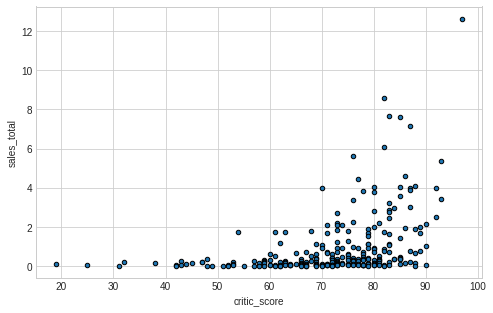

In [28]:
#Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков
ps4_influence.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(8,5))

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр.

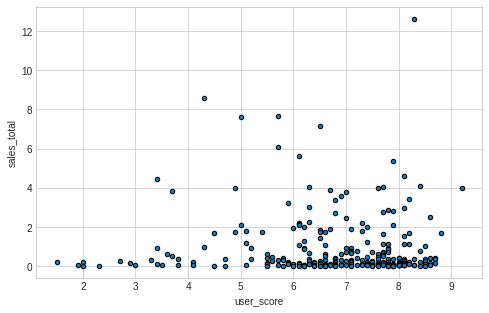

In [29]:
#Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов пользователей
ps4_influence = games[(games['platform'] == 'PS4') & (games['user_score'] > 0)].copy()
ps4_influence.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(8,5))

Похожая картина, но выбросов больше.

#### Посмотрим на корреляцию между отзывами и продажами по выбранной платформе

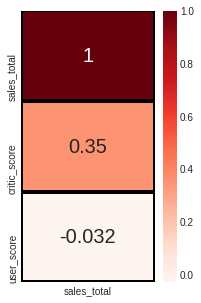

In [30]:
ps4_influence_filt = ps4_influence[['sales_total' ,'critic_score', 'user_score']]
plt.figure(figsize=(3,5))
sns.heatmap(ps4_influence_filt.corr()[['sales_total']].sort_values(by='sales_total', ascending=False),
            cmap= 'Reds', linewidths=3, linecolor='black', annot=True, annot_kws={'size':20})

И всё же видим, что сильнее всего на конечную стоимость влияет оценка критиков. Видимо при покупке игр пользователи больше доверяют критикам, нежели таким же пользователям.

#### И на корреляцию по топовым платформам

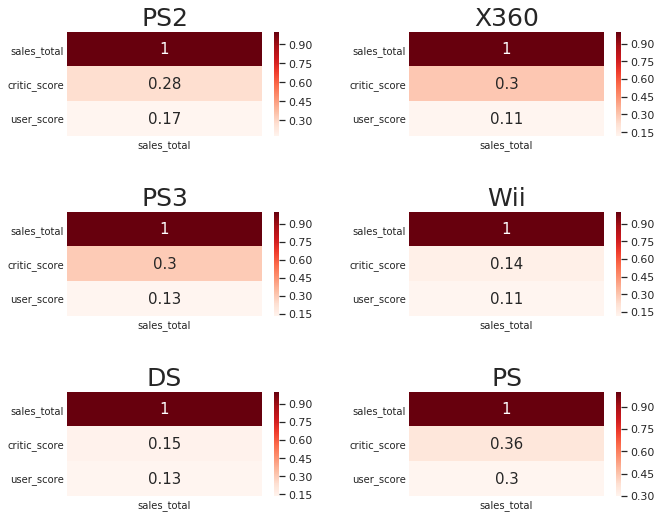

In [31]:
influence_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
rows = len(influence_top) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
count = 0
for r in range(rows):
    for c in range(cols):
        next_platform = influence_top[count]
        df_temp = games[(games['platform'] == next_platform) & (games['user_score'] > 0)].copy()
        
        df_filt = df_temp[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filt.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Reds", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(next_platform, fontsize=25)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

В целом, такая же картина - большее влияние имеет оценка критиков.
Выделяются Wii и DS, по которым зависимость не такая большая.

### Распределение игр по жанрам

In [32]:
pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

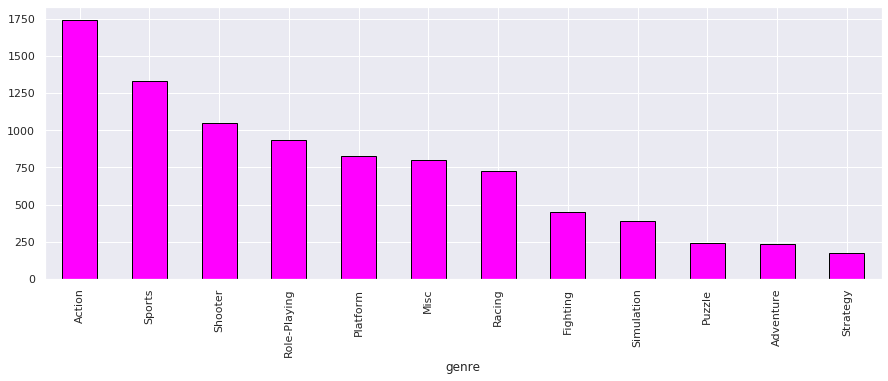

In [33]:
#рисуем столбчатую диаграмму по общей сумме продаж
pivot = games.groupby('genre').agg({'sales_total': 'sum'}).sort_values(by='sales_total', ascending=False)

genre_plot = pivot['sales_total']
genre_plot.plot(kind='bar', figsize=(15,5), ec='black', width=0.5, color='fuchsia')

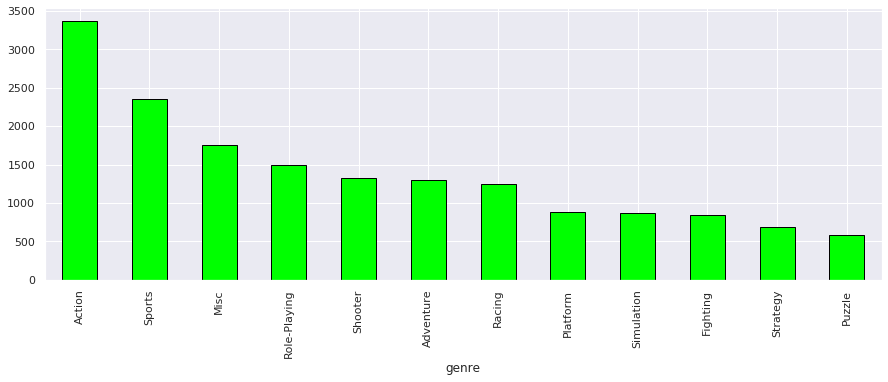

In [34]:
# по количеству продаж
pivot = games.groupby('genre').agg({'name': 'count'}).sort_values(by='name', ascending=False)

genre_plot2 = pivot['name']
genre_plot2.plot(kind='bar', figsize=(15,5), ec='black', width=0.5, color='lime')

Больше всего экшенов. За ними идут спортивные игры. Причем выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, видимо, стоят дороже, чем шутеры.

### Портрет пользователя регионов NA, EU, JP

#### Определение самых популярных платформх

In [35]:
#функция для прорисовки круговой диаграммы
def top_in_regions_plot(groupby, region_sales):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    plot = pivot.plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False,
                     pctdistance=0.45,figsize=(20,5), colormap='Pastel1', legend = False)
    

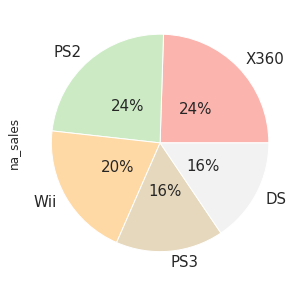

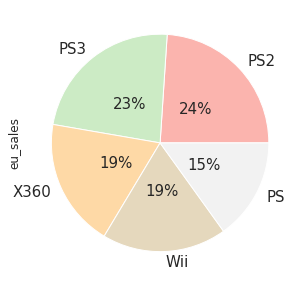

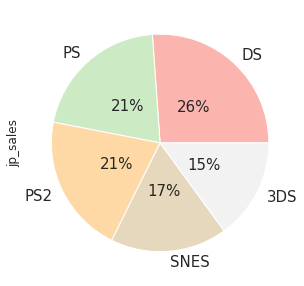

In [36]:
top_in_regions_plot('platform', 'na_sales')
top_in_regions_plot('platform', 'eu_sales')
top_in_regions_plot('platform', 'jp_sales')

В Северной Америке одинаково популярны приставки X360 и PS2. Немного отстает Wii. PS3 и DS в хвосте.

В Европе популярны PS2 и PS3. За ними X360 с Wii и замыкает PS.

В Японии всё иначе. Лидер - DS. За ним PS и PS2. И далее SNES и 3DS.

#### Самые популярные жанры

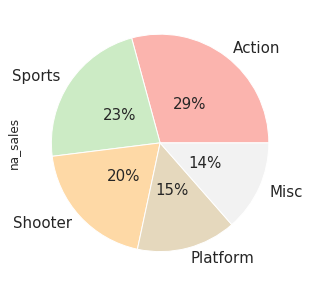

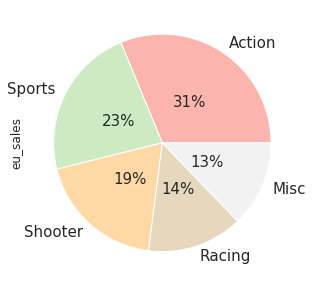

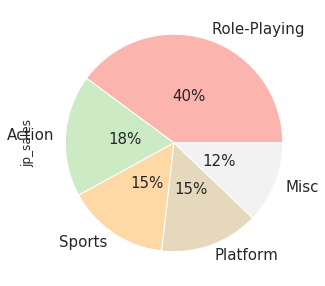

In [37]:
top_in_regions_plot('genre', 'na_sales')
top_in_regions_plot('genre', 'eu_sales')
top_in_regions_plot('genre', 'jp_sales')

Результаты по Северной Америке и Европе схожи: и там, и там популярны экшны, спортивные игры и шутеры. Но в Северной Америке чаще играют в платформеры, в Европе в гонки.  

В Японии на уверенном первом месте ролевые игры. Далее экшны, спортивные игры и платформеры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

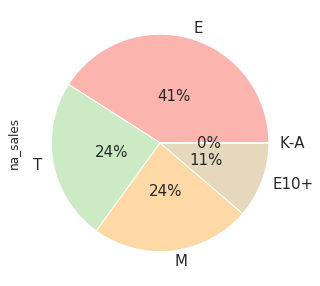

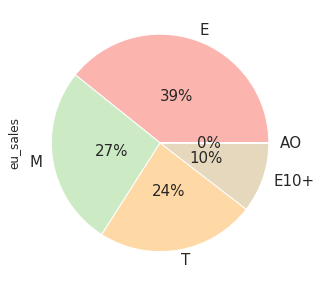

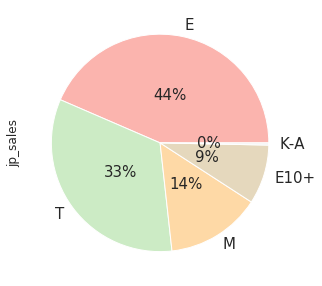

In [38]:
top_in_regions_plot('rating', 'na_sales')
top_in_regions_plot('rating', 'eu_sales')
top_in_regions_plot('rating', 'jp_sales')

В Северной Америке и в Европе картина опять практически идентична. Лидируют рейтинги "Для всех", после - с рейтингом "13-19 лет" и "для лиц старше 17 лет".  

В Японии первое место так же - "Для всех", на втором - игры для лиц от 13 до 19 лет. Причем процент выше, нежели в Европе и Сев. Америке.

# Шаг 5. Проверка гипотез

У нас есть две гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action и Sports разные. 
 
Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

<a id='section4'></a>

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
На основании нулевой гипотезы строим альтернативную:  
Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [39]:
score_xone_var = np.var(actual_data.query("platform == 'XOne'")['user_score'], ddof=1)                                            
print('Дисперсия пользовательского рейтинга по платформе XOne:', score_xone_var)
score_pc_var = np.var(actual_data.query("platform == 'PC'")['user_score'], ddof=1)
print('Дисперсия пользовательского рейтинга по платформе PC:', score_pc_var)

Дисперсия пользовательского рейтинга по платформе XOne: 12.41732563115105
Дисперсия пользовательского рейтинга по платформе PC: 10.325136778115503


Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются.

In [40]:
xone = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(
    xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < .01):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


###### Отклоняем нулевую гипотезу.
Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [41]:
#Средняя оценка пользователей для платформы XOne
xone.mean()

6.521428571428572

In [42]:
#Средняя оценка пользователей для платформы PC
pc.mean()

7.062467532467533

Компьютерные игры получают оценки статистически значимо выше, чем игры для Xbox One.

### Cредние пользовательские рейтинги жанров Action и Sports разные.  

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.    
На основании нулевой гипотезы строим альтернативную:  
Н1 - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [43]:
score_action_var = np.var(actual_data.query("genre == 'Action'")['user_score'], ddof=1)                                            
print('Дисперсия пользовательского рейтинга по жанру Action:', score_action_var)
score_action_var = np.var(actual_data.query("genre == 'Sports'")['user_score'], ddof=1)
print('Дисперсия пользовательского рейтинга по жанру Sports:', score_action_var)

Дисперсия пользовательского рейтинга по жанру Action: 16.270429256471957
Дисперсия пользовательского рейтинга по жанру Sports: 9.75038940809969


Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются.

In [44]:
action_rat = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports_rat = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(
    action_rat, sports_rat, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < .01):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Наша гипотеза подтвердилась.  
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Шаг 6. Общий вывод

Самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Соответственно рекламную кампанию нужно планировать с учетом данного фактора.  

Что выяснили в результате исследования:
- Средняя продолжительность жизни платформ - 10 лет.
- Наиболее популярные на данный момент платформы – это PS 4 и XOne.
- В США и Европе лучше всего продаются экшены, шутеры и спортивные игры.
- Япония – отдельный рынок со своей спецификой.